In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Data Cleaning
df = pd.read_csv('ecommerce-session-bigquery.csv')
df=df.sort_values(by='productQuantity')
df.dropna(axis=1, how='all', inplace=True)
print(df.columns)
df.head()

Index(['fullVisitorId', 'channelGrouping', 'time', 'country', 'city',
       'totalTransactionRevenue', 'transactions', 'timeOnSite', 'pageviews',
       'sessionQualityDim', 'date', 'visitId', 'type', 'productQuantity',
       'productPrice', 'productSKU', 'v2ProductName', 'v2ProductCategory',
       'productVariant', 'currencyCode', 'pageTitle', 'pagePathLevel1',
       'eCommerceAction_type', 'eCommerceAction_step'],
      dtype='object')


,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productQuantity,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
3231,1896269830191427155,Organic Search,190599,United States,not available in demo dataset,NaN,1.0,770.0,43.0,NaN,20160827,1472327023,EVENT,1.0,4990000,GGOEGBFC018799,Electronics Accessory Pouch,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
3083,7298179462068144853,Organic Search,416748,United States,not available in demo dataset,111270000.0,1.0,1604.0,30.0,NaN,20160823,1471976170,EVENT,1.0,13990000,GGOEGBCR024399,Google Lunch Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
4082,6204399065623532117,Referral,37969,United States,Mountain View,NaN,NaN,588.0,41.0,NaN,20160812,1471047656,EVENT,1.0,3990000,GGOEGBFC018799,Electronics Accessory Pouch,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,3,1
4636,7080198122068419243,Organic Search,100491,United Kingdom,London,NaN,NaN,1237.0,52.0,NaN,20160828,1472413821,EVENT,1.0,9990000,GGOEGBJC014399,Google Tote Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
5144,663370694453461636,Organic Search,111807,United States,Sunnyvale,NaN,NaN,383.0,32.0,NaN,20160831,1472699932,EVENT,1.0,9990000,GGOEGBJC014399,Google Tote Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1


#Identification of top products based on the total transaction revenue per day

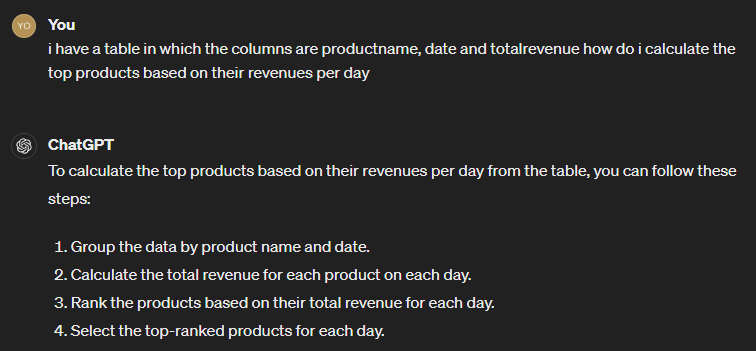

In [ ]:
#Data cleaning
df1 = df.groupby(['v2ProductName','date'])['totalTransactionRevenue'].sum()
df1=pd.DataFrame(df1)
df1['totalTransactionRevenue']=df1['totalTransactionRevenue'].astype(int)

#Identifying top products based on totalTransactionRevenue by dropping 0 values and sorting the rest
df1=df1.sort_values(by='totalTransactionRevenue',ascending=False)
df1.reset_index(inplace=True)
flag=0
for i in range(0, len(df1)):
    if df1['totalTransactionRevenue'][i] == 0:
        df1.drop(i, inplace=True)
        if flag == 0:
            flag=i
        else:
            continue
print(f'0 total transaction revenue start at index {flag}')
df1.head()
# ------------------------------
# use correlation matrix to select further clean up different columns for a more accurate analysis

0 total transaction revenue start at index 414


,v2ProductName,date,totalTransactionRevenue
0,YouTube RFID Journal,20170407,6831960000
1,Sport Bag,20160825,6239580000
2,Collapsible Shopping Bag,20160822,5982170000
3,Google Tote Bag,20160822,5945580000
4,Google Tote Bag,20160825,4087500000


#Anomaly detection in the number of transactions for a specific product.

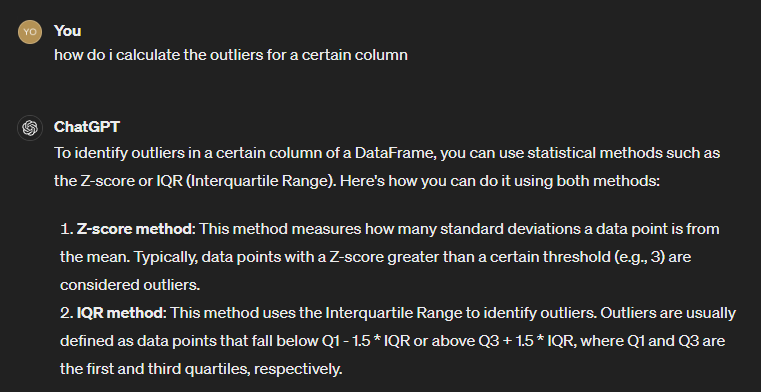

In [ ]:
# Data cleaning
columns = ['totalTransactionRevenue','productQuantity']
df2 = df.dropna(subset=columns)

#IQR
Q1 = df2['productQuantity'].quantile(0.25)
Q3 = df2['productQuantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = round(Q1 - 1.5 * IQR)
upper_bound = round(Q3 + 1.5 * IQR)

# min(df['productQuantity'])
outliers_iqr = df2[(df2['productQuantity'] < lower_bound) | (df2['productQuantity'] > upper_bound)]
outliers_iqr

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productQuantity,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
89,2675288268782734510,Referral,68534,United States,New York,273000000.0,1.0,532.0,25.0,78.0,20170722,1500739387,EVENT,25.0,35990000,GGOEGOCD078399,Google Leather Perforated Journal,${escCatTitle},(not set),USD,NaN,/storeitem.html,3,1
9696,7383823269227966775,Referral,71793,United States,New York,793880000.0,1.0,1041.0,23.0,NaN,20160815,1471288298,EVENT,32.0,4990000,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,3,1


In [ ]:
#Z Score
z_scores = (df2['productQuantity'] - df2['productQuantity'].mean()) / df2['productQuantity'].std()
z_threshold = 3

# Identify outliers using Z-score
outliers_z = df2[abs(z_scores) > z_threshold]
outliers_z

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productQuantity,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
89,2675288268782734510,Referral,68534,United States,New York,273000000.0,1.0,532.0,25.0,78.0,20170722,1500739387,EVENT,25.0,35990000,GGOEGOCD078399,Google Leather Perforated Journal,${escCatTitle},(not set),USD,NaN,/storeitem.html,3,1
9696,7383823269227966775,Referral,71793,United States,New York,793880000.0,1.0,1041.0,23.0,NaN,20160815,1471288298,EVENT,32.0,4990000,GGOEGBMJ013399,Sport Bag,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,3,1


#Identification of the most profitable city or province

Since I used the same logic for the first part of the solution, I did not prompt ChatGPT again

In [ ]:
#Data cleaning
df3 = df.groupby('city')['totalTransactionRevenue'].sum()
df3=pd.DataFrame(df3)
df3['totalTransactionRevenue']=df3['totalTransactionRevenue'].astype(int)

#Identifying top products based on totalTransactionRevenue by dropping 0 values and sorting the rest
df3=df3.sort_values(by='totalTransactionRevenue',ascending=False)
df3.reset_index(inplace=True)
flag=0
for i in range(0, len(df3)):
    if df3['totalTransactionRevenue'][i] == 0:
        df3.drop(i, inplace=True)
        if flag == 0:
            flag=i
        else:
            continue
print(f'0 total transaction revenue start at index {flag}')
df3.head()

0 total transaction revenue start at index 30


,city,totalTransactionRevenue
0,not available in demo dataset,65102440000
1,New York,21250810000
2,San Francisco,7774340000
3,Mountain View,5713290000
4,Toronto,5427980000


#Improvements

For the first and third part of the solution, I used basic calculation to analyzed using the data provided to me in their most raw form, however steps can be taken in order to improve upon the analysis such as using a categorical encoder along with a correlation matrix in order to identify the feature columns that have the most impact to the target column

In [ ]:
columnnn=['pageTitle']
df5=df.dropna(subset=columnnn)
df5.head()

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productQuantity,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
3231,1896269830191427155,Organic Search,190599,United States,not available in demo dataset,NaN,1.0,770.0,43.0,NaN,20160827,1472327023,EVENT,1.0,4990000,GGOEGBFC018799,Electronics Accessory Pouch,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
3083,7298179462068144853,Organic Search,416748,United States,not available in demo dataset,111270000.0,1.0,1604.0,30.0,NaN,20160823,1471976170,EVENT,1.0,13990000,GGOEGBCR024399,Google Lunch Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
4082,6204399065623532117,Referral,37969,United States,Mountain View,NaN,NaN,588.0,41.0,NaN,20160812,1471047656,EVENT,1.0,3990000,GGOEGBFC018799,Electronics Accessory Pouch,Home/Limited Supply/Bags/,(not set),USD,Bags,/google+redesign/,3,1
4636,7080198122068419243,Organic Search,100491,United Kingdom,London,NaN,NaN,1237.0,52.0,NaN,20160828,1472413821,EVENT,1.0,9990000,GGOEGBJC014399,Google Tote Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1
5144,663370694453461636,Organic Search,111807,United States,Sunnyvale,NaN,NaN,383.0,32.0,NaN,20160831,1472699932,EVENT,1.0,9990000,GGOEGBJC014399,Google Tote Bag,Home/Bags/,(not set),USD,Bags,/google+redesign/,3,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
df4 = df
encoder = LabelEncoder()
df4['channelGrouping'] = encoder.fit_transform(df4['channelGrouping'])
df4['country'] = encoder.fit_transform(df4['country'])
df4['city'] = encoder.fit_transform(df4['city'])
df4['type'] = encoder.fit_transform(df4['type'])
df4['productSKU'] = encoder.fit_transform(df4['productSKU'])
df4['v2ProductName'] = encoder.fit_transform(df4['v2ProductName'])
df4['v2ProductCategory'] = encoder.fit_transform(df4['v2ProductCategory'])
df4['productVariant'] = encoder.fit_transform(df4['productVariant'])
df4['currencyCode'] = encoder.fit_transform(df4['currencyCode'])
df4['pageTitle'] = encoder.fit_transform(df4['pageTitle'])
df4['pagePathLevel1'] = encoder.fit_transform(df4['pagePathLevel1'])
df4['pageTitle'] = encoder.fit_transform(df4['pageTitle'])
df4=df4.fillna(0)
corr = df4.corr()
corr

,fullVisitorId,channelGrouping,time,country,city,totalTransactionRevenue,transactions,timeOnSite,pageviews,sessionQualityDim,date,visitId,type,productQuantity,productPrice,productSKU,v2ProductName,v2ProductCategory,productVariant,currencyCode,pageTitle,pagePathLevel1,eCommerceAction_type,eCommerceAction_step
fullVisitorId,1.000000,-0.000124,0.019969,0.006303,0.009223,0.002214,-0.009419,0.023453,0.024956,0.007326,0.012866,0.014166,0.001341,0.002191,0.001578,-0.002717,-0.008608,-0.006603,NaN,-0.002390,0.005007,0.008404,0.005808,NaN
channelGrouping,-0.000124,1.000000,-0.012495,0.151484,-0.060166,0.027910,0.077543,0.000210,0.042075,0.019663,0.018270,0.045196,0.002112,0.013804,-0.044590,-0.014497,-0.012400,-0.065074,NaN,0.010056,0.059765,0.010440,0.005410,NaN
time,0.019969,-0.012495,1.000000,-0.001140,0.003503,0.107396,0.177237,0.739818,0.559746,0.023013,0.043661,0.055537,-0.048362,-0.002185,0.001601,-0.013261,0.008524,-0.058736,NaN,0.063201,0.047894,0.048383,0.051628,NaN
country,0.006303,0.151484,-0.001140,1.000000,-0.081350,0.028189,0.112210,0.026611,0.074347,0.011670,-0.021968,-0.032863,-0.023608,0.009610,0.003270,0.014139,0.010524,0.015067,NaN,0.010389,-0.020858,-0.022755,0.019489,NaN
city,0.009223,-0.060166,0.003503,-0.081350,1.000000,0.002776,-0.019185,-0.007190,0.003554,-0.024189,-0.012111,0.014284,-0.011756,-0.007229,0.007232,0.010313,-0.009945,-0.048274,NaN,0.017387,0.026726,-0.008909,0.008010,NaN
totalTransactionRevenue,0.002214,0.027910,0.107396,0.028189,0.002776,1.000000,0.437122,0.177902,0.211110,0.010519,0.048540,0.030742,-0.026688,0.072312,-0.011998,-0.020396,0.005761,-0.020983,NaN,0.016053,0.024241,0.046273,0.031610,NaN
transactions,-0.009419,0.077543,0.177237,0.112210,-0.019185,0.437122,1.000000,0.345044,0.402755,0.050370,0.015407,0.017716,-0.057851,0.085029,-0.019185,-0.003654,-0.007532,-0.033627,NaN,0.046075,0.035126,0.015167,0.089051,NaN
timeOnSite,0.023453,0.000210,0.739818,0.026611,-0.007190,0.177902,0.345044,1.000000,0.746501,0.036887,0.035808,0.035990,-0.055886,0.012054,-0.000731,-0.015935,0.005209,-0.038459,NaN,0.077649,0.019356,0.039615,0.082661,NaN
pageviews,0.024956,0.042075,0.559746,0.074347,0.003554,0.211110,0.402755,0.746501,1.000000,0.023072,0.007921,0.014305,-0.097058,0.015730,-0.012606,0.001188,0.001072,-0.046644,NaN,0.130645,0.034752,0.018022,0.129107,NaN
sessionQualityDim,0.007326,0.019663,0.023013,0.011670,-0.024189,0.010519,0.050370,0.036887,0.023072,1.000000,0.397675,0.406781,-0.035754,0.168334,-0.015074,-0.182830,0.003622,-0.070147,NaN,-0.007396,0.177568,0.365520,0.047014,NaN


In [ ]:
corr1 = pd.DataFrame(corr['totalTransactionRevenue'].fillna(0))
corr1.reset_index(inplace=True)
features=[]
score=[]
for i in range(0, len(corr1)):
    if corr1['totalTransactionRevenue'][i] > 0.01 or corr1['totalTransactionRevenue'][i] < -0.01:
        if corr1['index'][i] != 'totalTransactionRevenue':
            features.append(corr1['index'][i])
            score.append(corr1['totalTransactionRevenue'][i])
newCorr = pd.DataFrame()
newCorr['features']=features
newCorr['score']=score
newCorr

,features,score
0,channelGrouping,0.027910
1,time,0.107396
2,country,0.028189
3,transactions,0.437122
4,timeOnSite,0.177902
5,pageviews,0.211110
6,sessionQualityDim,0.010519
7,date,0.048540
8,visitId,0.030742
9,type,-0.026688


After creating the correlation matrix, the methods of analyzing has opened up, now it is known that some columns affect the total transaction revenue more than others. With this knowledge, analyzing for more specific business decisions become much easier. For example, the time spent on the site and the amount of pageviews positively correlate towards revenue, which may bring development in the direction of maximizing those two metrics in ways such as making the web page more attractive. The same logic can be applied to the third solution and the business decisions can be made accordingly.

For the second solution, the calculation earlier shows that the outliers are 25 and 30, however 4, 5 and 20 are also at the same frequency, which begs the question, why did the calculation not include these values?

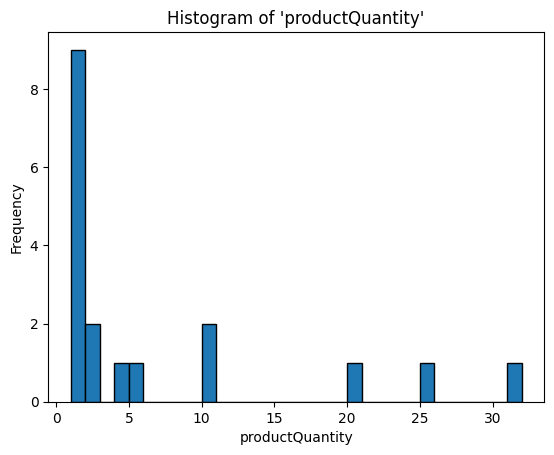

In [ ]:
plt.hist(df2['productQuantity'], bins=bin, edgecolor='black')
plt.xlabel('productQuantity')
plt.ylabel('Frequency')
plt.title('Histogram of \'productQuantity\'')
plt.show()

From this graph I have displayed the histogram of the productQuantity column. The exclusion of 4, 5 and 20 are now justifiable as being too far from the mean of the whole data while estimating the mean to be as high as 20 and definitely not higher. The plotting of the histogram shows how confusing analysis results can become easier to understand by visualizing the data too instead of just relying on pure calculations.